# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
data = pd.read_csv('googleplaystore.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 


In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [5]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [6]:
data.shape

(10841, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [8]:
data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [9]:
# First check null values
data['Size'].isnull().sum()

0

In [10]:
# Check Unique Values 
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [11]:
# find the values in size column which has 'M' in it
data['Size'].loc[data['Size'].str.contains('M')].value_counts().sum()

8830

In [12]:
# find the values in size column which has 'k' in it
data['Size'].loc[data['Size'].str.contains('k')].value_counts().sum()

316

In [13]:
# find the values in size column which has 'Varies with device' in it
data['Size'].loc[data['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [14]:
# Total Values in Size column
data['Size'].value_counts().sum()

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [15]:
# this function will convert the size column to numeric
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

data['Size'] = data['Size'].apply(convert_size)

In [16]:
# rename the column name 'Size' to 'Size_in_bytes'
data.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [17]:
# check the unique values in size column
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [18]:
# let's have a values counts
data['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [19]:
# find how many values has '+' in it
data['Installs'].loc[data['Installs'].str.contains('\+')].value_counts().sum()

10840

In [20]:
# Total values in Installs column
data['Installs'].value_counts().sum()

10841

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [21]:
# remove the plus sign from install column and convert it to numeric
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the number of installs/count)
data['Installs'] = data['Installs'].apply(lambda x: int(x))

- Let's verify if the dtypes has been changes and the `+` and `,` sign has been removed


In [22]:
data['Installs'].dtype

dtype('int64')

In [23]:
data['Installs'].max()

1000000000

- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [24]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
data['Installs_category'] = pd.cut(data['Installs'], bins=bins, labels=labels)

In [25]:
data['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let's have a look on the `Price` column

In [26]:
# check the unique values in the 'Price' column
data['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [27]:
data['Price'].isnull().sum()

0

- No Null Values

In [28]:
data['Price'].value_counts()

Price
0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.9

- We need to confirm if the values in the `Price` column are only with $ sign or not

In [29]:
# count the values having $ in the 'Price' column
data['Price'].loc[data['Price'].str.contains('\$')].value_counts().sum()

800

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [30]:
# remove the dollar sign from the price column and convert it to numeric
data['Price'] = data['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
data['Price'] = data['Price'].apply(lambda x: float(x))

In [31]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {data['Price'].min()} $")
print(f"Max price is: {data['Price'].max()} $")
print(f"Average price is: {data['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


### **2.1. Descriptive Statistics**

In [32]:
data.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

- Lets looks have a missing values in the datasets

In [33]:
data.isnull().sum().sort_values(ascending=True)

Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
App                     1
Type                    1
Genres                  1
Android Ver             2
Current Ver             8
Rating               1474
Size_in_bytes        1695
dtype: int64

In [34]:
data.isnull().sum().sum()

3182

In [35]:
(data.isnull().sum() / len(data) * 100).sort_values(ascending=True)

Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
App                   0.009224
Type                  0.009224
Genres                0.009224
Android Ver           0.018448
Current Ver           0.073794
Rating               13.596532
Size_in_bytes        15.635089
dtype: float64

- Lets plots a missing values in the graph

<Axes: >

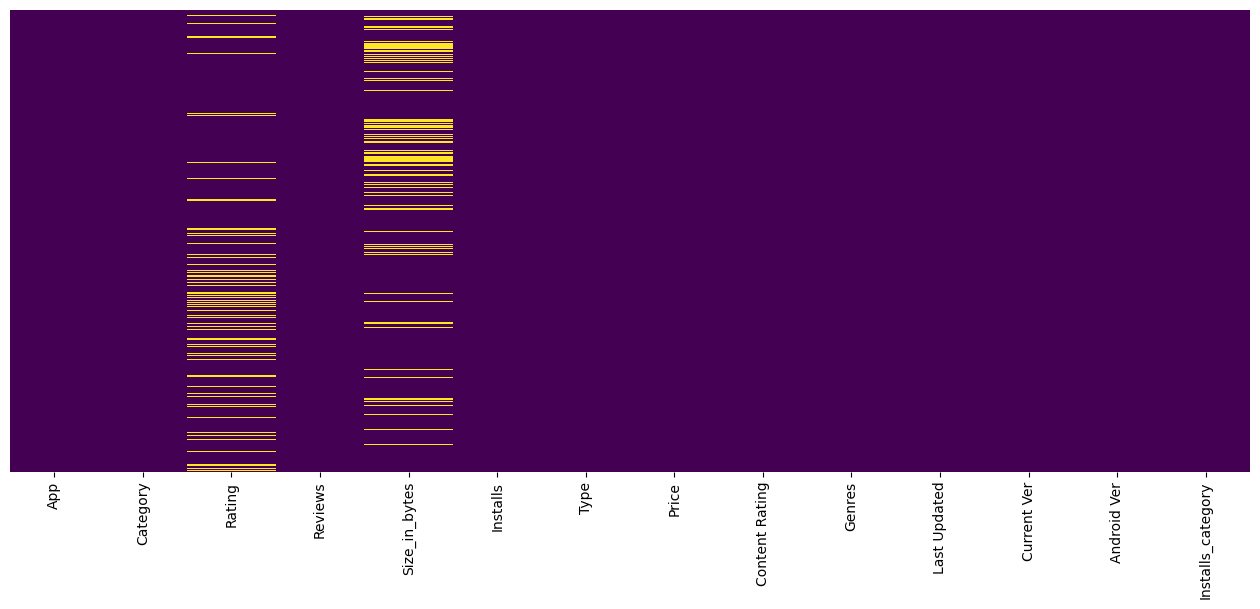

In [36]:
plt.figure(figsize=(16,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

-  Lets Plot missing value according to percentage

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

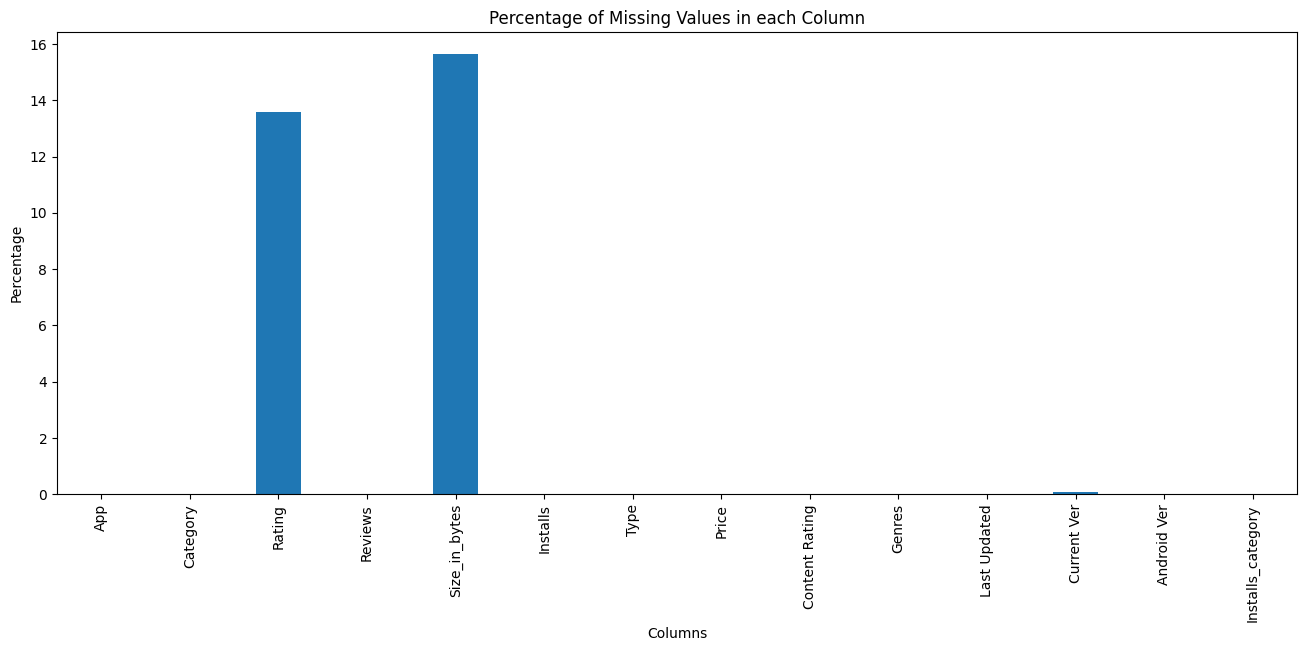

In [37]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = data.isnull().sum()/len(data)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Lets Start the process of corelation

<Axes: >

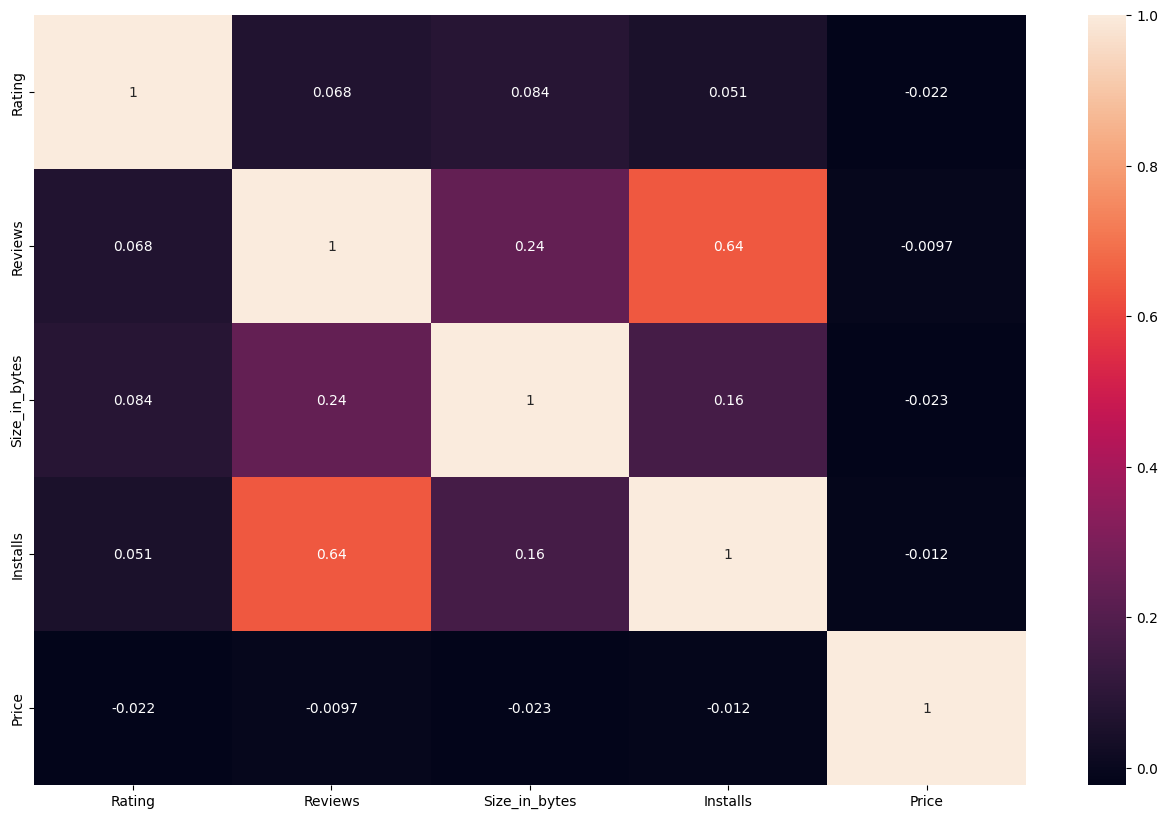

In [38]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price'] # make a list of numeric columns
sns.heatmap(data[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [39]:
data[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000


In [40]:
from scipy import stats

data_clean = data.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(data_clean['Reviews'], data_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [41]:
# length before removing null values
print(f"Length of the dataframe after removing null values: {len(data)}")

Length of the dataframe after removing null values: 10841


In [42]:
data.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [43]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(data)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [45]:
# let's check the null values again
data.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [46]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Installs_category'],
      dtype='object')

In [47]:
# use groupby function to find the trend of Rating in each Installs_category
data.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [48]:
data['Rating'].isnull().sum()

1469

In [49]:
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

- Lets plot this and have a Look

Text(7, 3.5, 'Null values: 0')

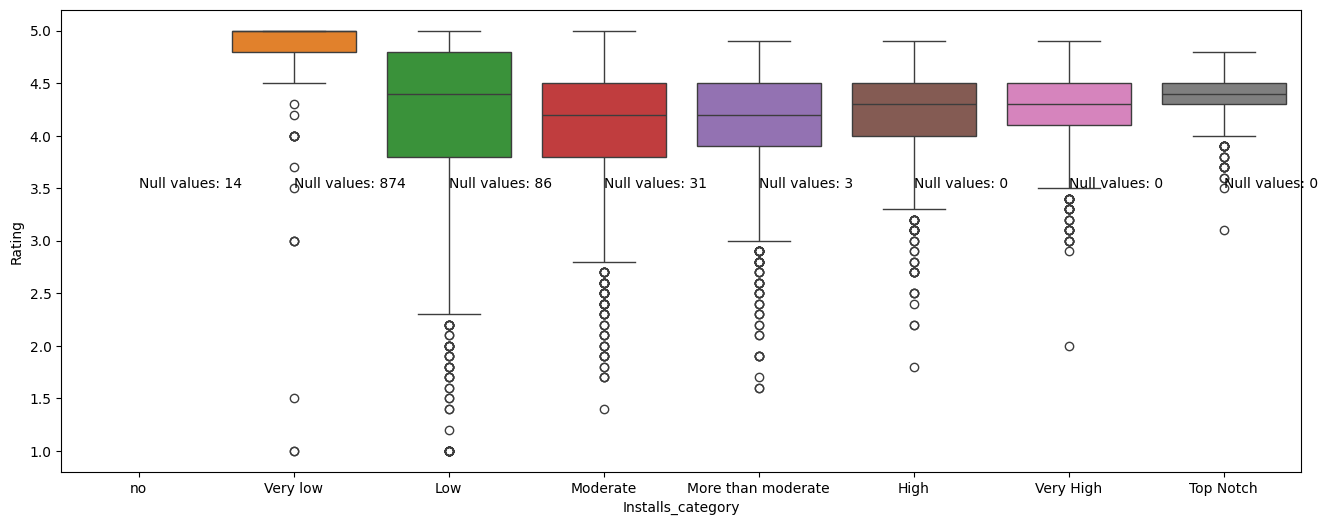

In [51]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=data) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [52]:
data['Installs_category'].loc[data['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no null value in Reiview

<Axes: xlabel='Installs_category', ylabel='Reviews'>

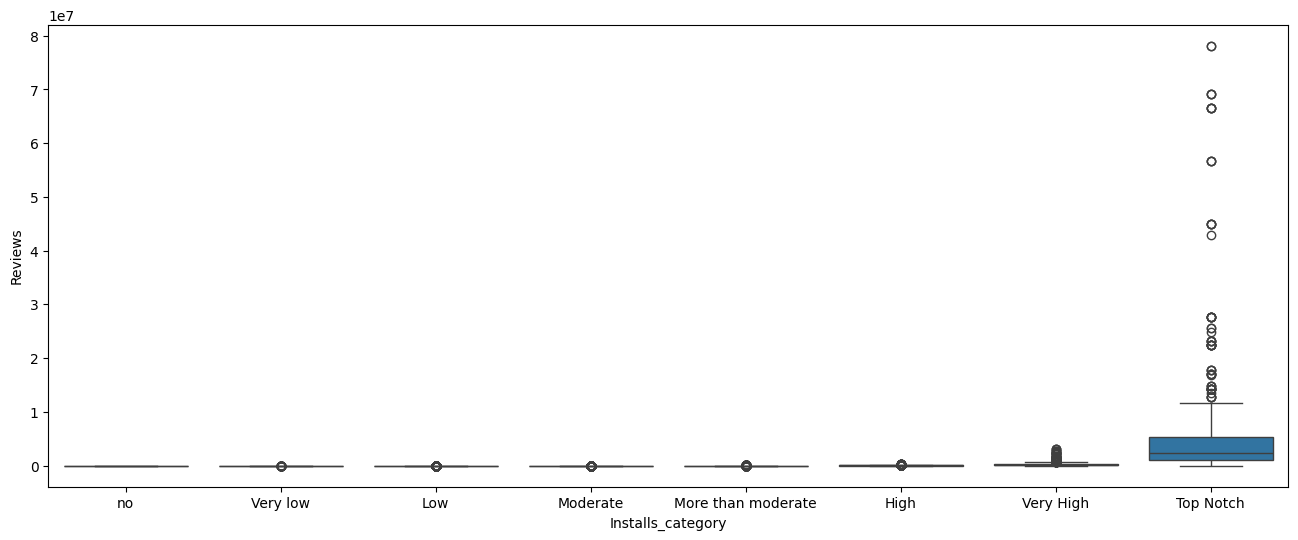

In [54]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=data) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

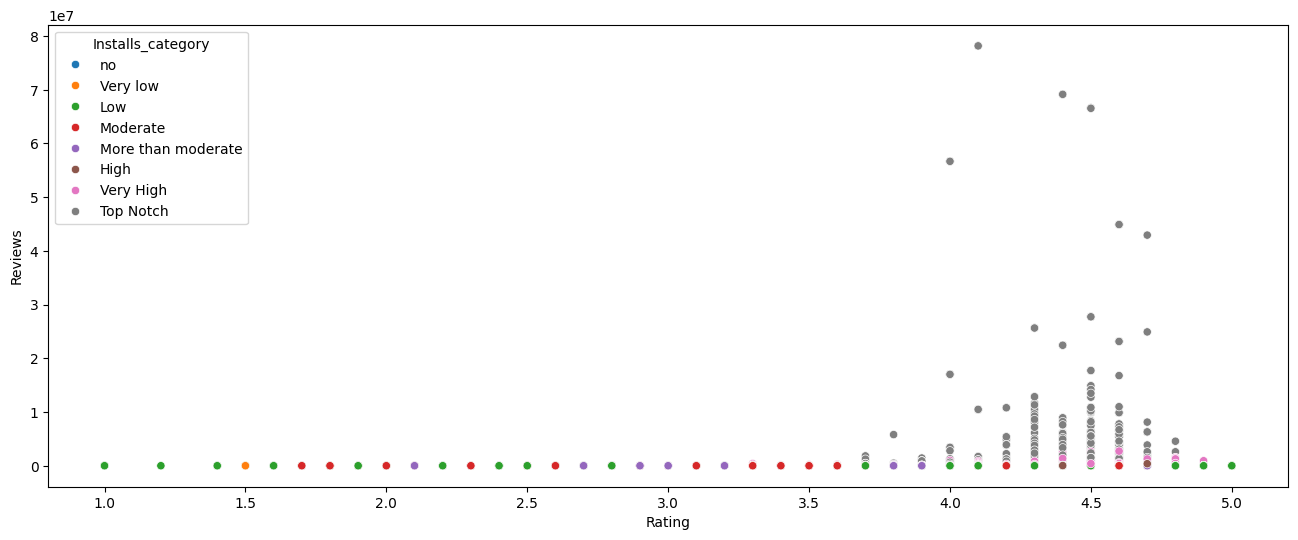

In [55]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=data) # plot the scatter plot

<Axes: xlabel='Reviews', ylabel='Installs'>

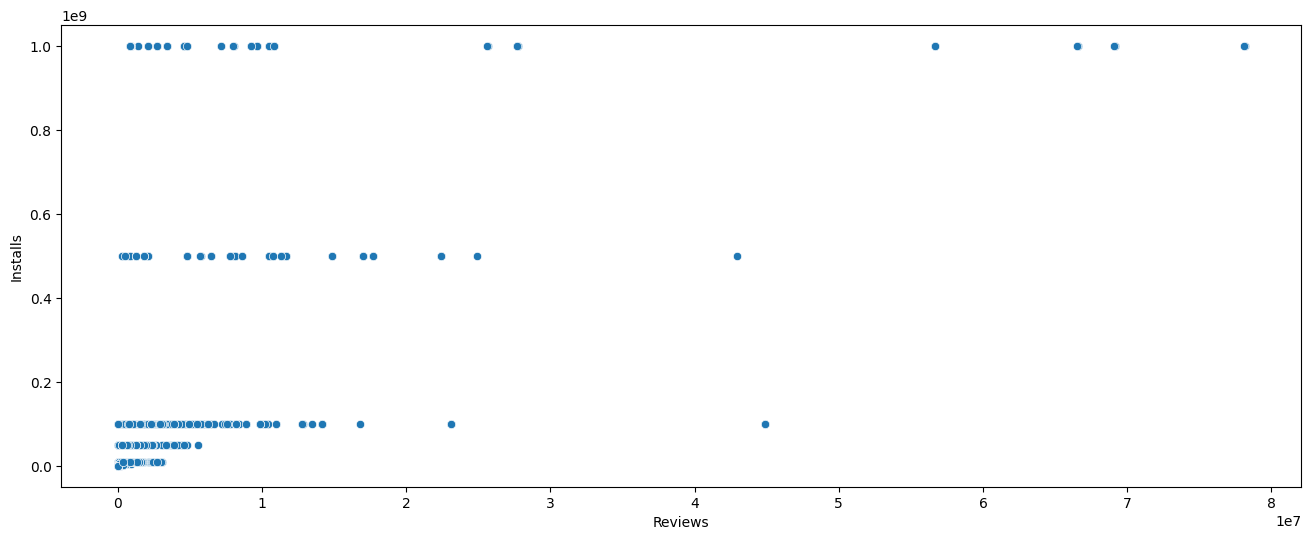

In [56]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=data) # plot the scatter plot

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

---

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


In [57]:
data.duplicated().sum()

483

* let's check for number of duplicates in each column using a for loop and printing the output

In [58]:
for col in data.columns:
    print(f"Number of Dulicates in {col} columns are {data[col].duplicated().sum()}")

Number of Dulicates in App columns are 1181
Number of Dulicates in Category columns are 10796
Number of Dulicates in Rating columns are 10789
Number of Dulicates in Reviews columns are 4830
Number of Dulicates in Size_in_bytes columns are 10373
Number of Dulicates in Installs columns are 10809
Number of Dulicates in Type columns are 10827
Number of Dulicates in Price columns are 10737
Number of Dulicates in Content Rating columns are 10823
Number of Dulicates in Genres columns are 10710
Number of Dulicates in Last Updated columns are 9453
Number of Dulicates in Current Ver columns are 8046
Number of Dulicates in Android Ver columns are 10796
Number of Dulicates in Installs_category columns are 10821


- This means that the only better way to find duplicates is to check for whole data

In [59]:
print(f"Number of Duplicated in whole data is {data.duplicated().sum()}")

Number of Duplicated in whole data is 483


- Find and watch all duplicates if they are real!

In [60]:
# find exact duplicates and print them
data[data['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up,More than moderate
3083,365Scores - Live Scores,SPORTS,4.6,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up,Very High
5415,365Scores - Live Scores,SPORTS,4.6,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up,Very High


* Removes all Duplicated

In [62]:
data.drop_duplicates(inplace=True)

In [64]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---